<a href="https://colab.research.google.com/github/subodhkanoujiya4/Linear_Regression/blob/main/Linear_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
from google.colab import files
uploaded = files.upload()

Saving Housing.csv to Housing (1).csv



 Multiple Linear Regression Evaluation
MAE: 970043.4039201636
MSE: 1754318687330.6638
R² Score: 0.6529242642153184

 Coefficients (Multiple Linear Regression):
area: 235.97
bedrooms: 76778.70
bathrooms: 1094444.79
stories: 407476.59
parking: 224841.91
mainroad_yes: 367919.95
guestroom_yes: 231610.04
basement_yes: 390251.18
hotwaterheating_yes: 684649.89
airconditioning_yes: 791426.74
prefarea_yes: 629890.57
furnishingstatus_semi-furnished: -126881.82
furnishingstatus_unfurnished: -413645.06

 Simple Linear Regression Evaluation (Feature: area)
MAE: 1474748.1337969352
MSE: 3675286604768.185
R² Score: 0.27287851871974644
Slope (Coefficient): 425.72984193878284
Intercept: 2512254.2639593435


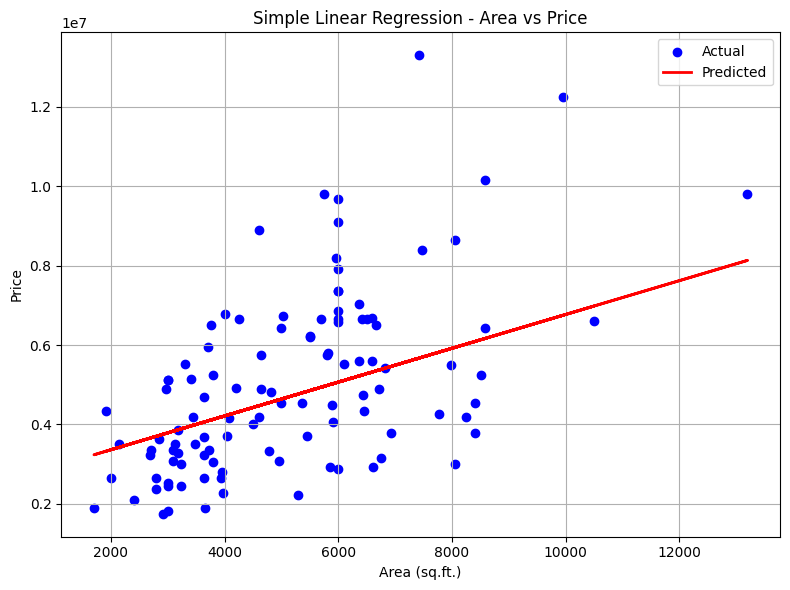

In [5]:
# === Import Libraries ===
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# === Load Dataset ===
df = pd.read_csv("Housing.csv")

# === Encode Categorical Variables ===
X = df.drop("price", axis=1)
y = df["price"]
categorical_cols = X.select_dtypes(include=["object"]).columns
X_encoded = pd.get_dummies(X, columns=categorical_cols, drop_first=True)

# === Multiple Linear Regression ===
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=42)

multi_model = LinearRegression()
multi_model.fit(X_train, y_train)
y_pred_multi = multi_model.predict(X_test)

# Evaluation
print("\n Multiple Linear Regression Evaluation")
print("MAE:", mean_absolute_error(y_test, y_pred_multi))
print("MSE:", mean_squared_error(y_test, y_pred_multi))
print("R² Score:", r2_score(y_test, y_pred_multi))

# Coefficients
print("\n Coefficients (Multiple Linear Regression):")
for feature, coef in zip(X_encoded.columns, multi_model.coef_):
    print(f"{feature}: {coef:.2f}")

# === Simple Linear Regression (Using 'area') ===
X_simple = df[['area']]
y_simple = df['price']

X_train_s, X_test_s, y_train_s, y_test_s = train_test_split(X_simple, y_simple, test_size=0.2, random_state=42)

simple_model = LinearRegression()
simple_model.fit(X_train_s, y_train_s)
y_pred_simple = simple_model.predict(X_test_s)

# Evaluation
print("\n Simple Linear Regression Evaluation (Feature: area)")
print("MAE:", mean_absolute_error(y_test_s, y_pred_simple))
print("MSE:", mean_squared_error(y_test_s, y_pred_simple))
print("R² Score:", r2_score(y_test_s, y_pred_simple))
print("Slope (Coefficient):", simple_model.coef_[0])
print("Intercept:", simple_model.intercept_)

# === Plot Regression Line ===
plt.figure(figsize=(8, 6))
plt.scatter(X_test_s, y_test_s, color='blue', label="Actual")
plt.plot(X_test_s, y_pred_simple, color='red', linewidth=2, label="Predicted")
plt.xlabel("Area (sq.ft.)")
plt.ylabel("Price")
plt.title("Simple Linear Regression - Area vs Price")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()
